
# Introduction to NumPy and Pandas for Weather and Climate Data Analysis

This tutorial is designed for beginners to learn about NumPy and Pandas, two essential libraries in Python for data manipulation and analysis. We'll focus on applying these libraries to weather and climate data analysis.

## Table of Contents

1. [Part 1: Introduction to NumPy](#part-1-introduction-to-numpy)
   - Basic array operations
   - Mathematical functions
   - Array indexing and slicing
   - Broadcasting
   - Example: Temperature data analysis

2. [Part 2: Introduction to Pandas](#part-2-introduction-to-pandas)
   - Series and DataFrames
   - Data loading and saving
   - Data selection and filtering
   - Data aggregation and grouping
   - Time series analysis
   - Example: Weather station data analysis



## Part 1: Introduction to NumPy

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficient

The numpy library is short for "numerical python" In this notebook I will motivate numpy and as demonstrate aspects of it's functionality Numpy is a huge library with tons of capabilities so there will be a lot we don't cover. The numpy documentation is excellent for when you need to dive in deeper: https://numpy.org/doc/stable/ 

There is also a really nice quickstart guide that covers many of the things we will see here and helps to reinforce key concepts in a concise way: https://numpy.org/doc/stable/user/quickstart.html 

To start with numpy you can import it. The  line `import numpy as np` is the standard way to import it. This just renames `numpy` as `np` to save you time on typing I'm also importing math so that we can compare and finally the function from the end of the [introduction to python](...) notebook from this course.

:::{note}
If you are following this material on GitHub codespaces or via the provided Docker container/Conda environment this import line should just work. If you are following along with your own computer and python installation (or if the words Docker/Conda don't ring a bell) you may have to install `numpy` separately. `numpy`, like many of the python packages that we'll use in this course are actually externally developed and not included int the basic python installation. You can think of these packages like browser extensions or plugins for CAD/GIS software.
:::ly.


In [2]:

import numpy as np

# Create a simple array
temp_data = np.array([20, 25, 22, 18, 23])
print("Temperature data:", temp_data)

# Array attributes
print("Shape:", temp_data.shape)
print("Data type:", temp_data.dtype)

# Basic operations
print("Mean temperature:", np.mean(temp_data))
print("Max temperature:", np.max(temp_data))
print("Min temperature:", np.min(temp_data))


Temperature data: [20 25 22 18 23]
Shape: (5,)
Data type: int32
Mean temperature: 21.6
Max temperature: 25
Min temperature: 18



In this code block, we:
1. Import NumPy as `np`, which is the conventional alias.
2. Create a simple 1D array `temp_data` with temperature values.
3. Print the array to see its contents.
4. Demonstrate basic array attributes:
   - `shape`: Shows the dimensions of the array (in this case, it's a 1D array with 5 elements).
   - `dtype`: Shows the data type of the array elements (likely int64 or float64).
5. Perform basic statistical operations:
   - `np.mean()`: Calculates the average temperature.
   - `np.max()`: Finds the highest temperature.
   - `np.min()`: Finds the lowest temperature.

These operations demonstrate how easily NumPy can handle basic array manipulations and calculations.



### Array Creation and Operations

NumPy provides various ways to create arrays and perform operations on them.


In [3]:

# Create an array of evenly spaced values
days = np.arange(1, 32)  # Days in a month
print("Days:", days)

# Create an array of random temperatures
temperatures = np.random.randint(15, 35, size=31)  # Random temps between 15�C and 35�C
print("Random temperatures:", temperatures)

# Element-wise operations
celsius_to_fahrenheit = temperatures * 9/5 + 32
print("Temperatures in Fahrenheit:", celsius_to_fahrenheit)


Days: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Random temperatures: [30 22 33 20 25 16 26 33 26 21 31 29 22 16 20 32 16 19 19 21 29 29 34 28
 28 25 22 34 20 21 26]
Temperatures in Fahrenheit: [86.  71.6 91.4 68.  77.  60.8 78.8 91.4 78.8 69.8 87.8 84.2 71.6 60.8
 68.  89.6 60.8 66.2 66.2 69.8 84.2 84.2 93.2 82.4 82.4 77.  71.6 93.2
 68.  69.8 78.8]



This code block demonstrates:
1. Creating an array with `np.arange()`:
   - Generates a sequence from 1 to 31, representing days in a month.
2. Using `np.random.randint()` to create random data:
   - Generates 31 random integers between 15 and 35, simulating daily temperatures.
3. Performing element-wise operations:
   - Converts Celsius temperatures to Fahrenheit using the formula (C * 9/5 + 32).
   - NumPy automatically applies this operation to each element in the array.

These examples show how NumPy can efficiently generate data and perform calculations on entire arrays at once, which is much faster than using Python loops.



### Array Indexing and Slicing

NumPy arrays can be indexed and sliced similarly to Python lists, but with more powerful capabilities.


In [5]:

# Indexing
print("Temperature on day 5:", temperatures[4])  # Remember, indexing starts at 0

# Slicing
print("First week temperatures:", temperatures[:7])
print("Every third day temperature:", temperatures[::3])

# Boolean indexing
hot_days = temperatures[temperatures > 30]
print("Hot days (>30 deg C):", hot_days)


Temperature on day 5: 25
First week temperatures: [30 22 33 20 25 16 26]
Every third day temperature: [30 20 26 21 22 32 19 29 28 34 26]
Hot days (>30 deg C): [33 33 31 32 34 34]



This code block illustrates different ways to access data in NumPy arrays:
1. Indexing:
   - Accesses a single element (5th day's temperature, index 4 due to 0-based indexing).
2. Slicing:
   - `temperatures[:7]`: Gets the first 7 elements (first week's temperatures).
   - `temperatures[::3]`: Gets every 3rd element (temperature every third day).
3. Boolean indexing:
   - Creates a boolean mask (`temperatures > 30`) and uses it to filter the array.
   - Returns only the temperatures above 30 &deg;C.

These techniques demonstrate the flexibility of NumPy in accessing and filtering data, which is crucial for data analysis tasks.



### Broadcasting

Broadcasting is a powerful mechanism that allows NumPy to work with arrays of different shapes when performing arithmetic operations.


In [8]:

# Create a 2D array of temperatures (7 days, 4 weeks)
monthly_temps = np.random.randint(15, 35, size=(4, 7))
print("Monthly temperatures:", monthly_temps)

# Add 5 degrees to all temperatures
adjusted_temps = monthly_temps + 5
print("Adjusted temperatures:", adjusted_temps)

# Calculate weekly averages
weekly_avgs = np.mean(monthly_temps, axis=1)
print("Weekly averages:", weekly_avgs)


Monthly temperatures: [[23 18 24 23 27 25 24]
 [17 21 24 24 19 33 22]
 [16 16 31 25 31 20 16]
 [18 19 18 24 34 23 30]]
Adjusted temperatures: [[28 23 29 28 32 30 29]
 [22 26 29 29 24 38 27]
 [21 21 36 30 36 25 21]
 [23 24 23 29 39 28 35]]
Weekly averages: [23.42857143 22.85714286 22.14285714 23.71428571]


This code snippet demonstrates the use of NumPy to generate, manipulate, and analyze temperature data.
1. Creating Random Temperature Data
- `monthly_temps = np.random.randint(15, 35, size=(4, 7))`
- Creates a 2D array of random integers between 15 and 35 (inclusive).
- The array has 4 rows (representing weeks) and 7 columns (representing days).
- Simulates temperature data for a month.


2. Adjusting Temperatures
- `adjusted_temps = monthly_temps + 5`
- Adds 5 degrees to all temperatures in the array.
- Demonstrates element-wise operation on NumPy arrays.


3. Calculating Weekly Averages
- `weekly_avgs = np.mean(monthly_temps, axis=1)`
- Calculates the mean temperature for each week.
- `axis=1` specifies that the mean should be calculated across each row (i.e., for each week).

The `print` statements throughout the code display the original temperatures, adjusted temperatures, and weekly averages, allowing for easy visualization of the data and results.


## Part 2: Introduction to Pandas**Pandas** is a powerful and flexible open-source data analysis and manipulation library for Python. It provides easy-to-use data structures and data analysis tools designed for working with structured data. Pandas is particularly well-suited for tasks such as data cleaning, transformation, and analysis.

#### Key Features:
- **Data Structures:** Pandas introduces two main data structures:
  - **Series:** A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, etc.).
  - **DataFrame:** A two-dimensional labeled data structure with columns of potentially different types, similar to a table in a relational database or an Excel spreadsheet.

- **Data Manipulation:** Pandas offers a wide array of functions for:
  - **Reading/Writing Data:** Importing data from various file formats (CSV, Excel, SQL, etc.) and exporting data to these formats.
  - **Data Cleaning:** Handling missing values, filtering data, and transforming data.
  - **Data Aggregation:** Grouping, summarizing, and pivoting data for in-depth analysis.

- **Time Series Analysis:** Pandas has robust support for handling time series data, including date range generation, resampling, and frequency conversion.

- **Merging and Joining:** Combining datasets using merge, join, and concatenate functions.ly.


Let's explore the various utilities of this library!

In [9]:

import pandas as pd
import numpy as np

# Create a simple Series
dates = pd.date_range('20230101', periods=31)
temp_series = pd.Series(np.random.randint(15, 35, size=31), index=dates)
print(temp_series)


2023-01-01    20
2023-01-02    27
2023-01-03    21
2023-01-04    30
2023-01-05    23
2023-01-06    28
2023-01-07    34
2023-01-08    28
2023-01-09    18
2023-01-10    34
2023-01-11    28
2023-01-12    33
2023-01-13    27
2023-01-14    15
2023-01-15    23
2023-01-16    21
2023-01-17    19
2023-01-18    23
2023-01-19    19
2023-01-20    31
2023-01-21    16
2023-01-22    26
2023-01-23    24
2023-01-24    16
2023-01-25    28
2023-01-26    22
2023-01-27    34
2023-01-28    31
2023-01-29    15
2023-01-30    29
2023-01-31    23
Freq: D, dtype: int32


### Code Explanation: Generating a Time Series of Random Temperature Data

In this code snippet, we are using `pandas` and `numpy` to create a simple time series of random temperature data.

#### Step-by-step Breakdown:

1. **Importing Libraries:**
   - We import `pandas` as `pd` and `numpy` as `np`. 
   - `pandas` is used for handling and manipulating data, while `numpy` is used for numerical operations and random number generation.

2. **Generating a Date Range:**
   - `pd.date_range('20230101', periods=31)` creates a range of dates starting from January 1, 2023, and spanning 31 days. 
   - The result is a `DatetimeIndex` object that acts as an index for the Series.

3. **Creating the Temperature Series:**
   - `np.random.randint(15, 35, size=31)` generates 31 random integers between 15 and 35, simulating daily temperature readings.
   - These random temperatures are then associated with the date range as their index.

4. **Creating the Series:**
   - `pd.Series(..., index=dates)` creates a `pandas` Series with the random temperature values and uses the generated dates as the index.

5. **Displaying the Result:**
   - `print(temp_series)` prints out the generated Series, which shows daily temperatures for January 2023.

The final output will be a list of 31 temperature values, each corresponding to a date between January 1, 2023, and January 31, 2023.



### DataFrames

DataFrames are 2-dimensional labeled data structures with columns of potentially different types.


In [10]:

# Create a DataFrame with weather data
weather_data = pd.DataFrame({
    'temperature': np.random.randint(15, 35, size=31),
    'humidity': np.random.randint(30, 90, size=31),
    'wind_speed': np.random.randint(0, 20, size=31)
}, index=dates)

print(weather_data.head())

# Basic statistics
print(weather_data.describe())


            temperature  humidity  wind_speed
2023-01-01           29        62           4
2023-01-02           20        64          18
2023-01-03           15        37          15
2023-01-04           29        43           0
2023-01-05           22        89          18
       temperature   humidity  wind_speed
count    31.000000  31.000000   31.000000
mean     25.387097  59.612903   10.096774
std       6.391022  17.289067    6.399765
min      15.000000  34.000000    0.000000
25%      19.500000  44.000000    5.500000
50%      26.000000  62.000000   10.000000
75%      31.500000  75.000000   16.000000
max      34.000000  89.000000   19.000000


### Code Explanation: Creating a DataFrame with Weather Data and Generating Basic Statistics

In this code snippet, we are creating a `pandas` DataFrame that simulates weather data over a 31-day period. The DataFrame contains columns for temperature, humidity, and wind speed. We then compute basic statistics for the data.

#### Step-by-step Breakdown:

1. **Creating the DataFrame:**
   - `pd.DataFrame({...}, index=dates)` creates a DataFrame with three columns: `temperature`, `humidity`, and `wind_speed`. 
   - Each column is populated using `np.random.randint()`, which generates random integers:
     - **Temperature** values range between 15 and 35 degrees Celsius.
     - **Humidity** values range between 30% and 90%.
     - **Wind Speed** values range between 0 and 20 meters per second.
   - The `index=dates` assigns the previously generated date range as the index for this DataFrame.

2. **Displaying the Data:**
   - `weather_data.head()` prints the first 5 rows of the DataFrame, allowing us to preview the weather data for the first 5 days.

3. **Generating Basic Statistics:**
   - `weather_data.describe()` generates descriptive statistics for the DataFrame, including:
     - **Count**: Number of data points.
     - **Mean**: The average value for each column.
     - **Standard Deviation (std)**: The spread of the data from the mean.
     - **Min/Max**: Minimum and maximum values in the dataset.
     - **25%, 50%, 75%**: Quartiles, giving a sense of the distribution of values.

The final output will be a DataFrame preview with the first 5 rows and summary statistics for the entire weather data.



### Data Selection and Filtering

Pandas provides powerful ways to select and filter data.


In [13]:

# Select a single column
print(weather_data['temperature'])

# Select multiple columns
print(weather_data[['temperature', 'humidity']])

# Filter rows based on a condition
hot_days = weather_data[weather_data['temperature'] > 30]
print("Hot days:", hot_days)

# Combine conditions
hot_and_humid = weather_data[(weather_data['temperature'] > 30) & (weather_data['humidity'] > 70)]
print("Hot and humid days:", hot_and_humid)


2023-01-01    29
2023-01-02    20
2023-01-03    15
2023-01-04    29
2023-01-05    22
2023-01-06    18
2023-01-07    17
2023-01-08    34
2023-01-09    34
2023-01-10    32
2023-01-11    18
2023-01-12    34
2023-01-13    15
2023-01-14    16
2023-01-15    26
2023-01-16    32
2023-01-17    30
2023-01-18    33
2023-01-19    22
2023-01-20    31
2023-01-21    28
2023-01-22    23
2023-01-23    33
2023-01-24    19
2023-01-25    26
2023-01-26    19
2023-01-27    20
2023-01-28    27
2023-01-29    24
2023-01-30    29
2023-01-31    32
Freq: D, Name: temperature, dtype: int32
            temperature  humidity
2023-01-01           29        62
2023-01-02           20        64
2023-01-03           15        37
2023-01-04           29        43
2023-01-05           22        89
2023-01-06           18        75
2023-01-07           17        66
2023-01-08           34        75
2023-01-09           34        67
2023-01-10           32        48
2023-01-11           18        75
2023-01-12           34 

### Code Explanation: Selecting and Filtering Data from the Weather DataFrame

This code demonstrates how to select columns and filter rows from a `pandas` DataFrame based on specific conditions. The operations focus on accessing and filtering weather data for temperature and humidity.

#### Step-by-step Breakdown:

1. **Selecting a Single Column:**
   - `weather_data['temperature']` selects and prints the `temperature` column from the DataFrame.
   - This returns a `pandas` Series that contains all temperature values indexed by the corresponding dates.

2. **Selecting Multiple Columns:**
   - `weather_data[['temperature', 'humidity']]` selects both the `temperature` and `humidity` columns and prints them.
   - The result is a new DataFrame with only the two specified columns.

3. **Filtering Rows Based on a Condition:**
   - `weather_data[weather_data['temperature'] > 30]` filters and returns only the rows where the temperature is greater than 30 degrees.
   - The result is a subset of the original DataFrame containing only the "hot days."

4. **Combining Conditions:**
   - `weather_data[(weather_data['temperature'] > 30) & (weather_data['humidity'] > 70)]` applies two conditions:
     - Temperature greater than 30 degrees.
     - Humidity greater than 70%.
   - Rows satisfying both conditions are returned in a new DataFrame (`hot_and_humid`), displaying the dates where both conditions are met, representing "hot and humid days."

This shows how to extract specific subsets of data using both column selection and row filtering based on conditions.



### Data Aggregation and Grouping

Pandas allows you to easily aggregate and group data.


In [15]:

# Add a 'month' column
weather_data['month'] = weather_data.index.month

# Group by month and calculate mean
monthly_avg = weather_data.groupby('month').mean()
print("Monthly averages:", monthly_avg)

# Resample to weekly frequency
weekly_data = weather_data.resample('W').mean()
print("Weekly data:", weekly_data)


Monthly averages:        temperature   humidity  wind_speed
month                                    
1        25.387097  59.612903   10.096774
Weekly data:             temperature   humidity  wind_speed  month
2023-01-01    29.000000  62.000000    4.000000    1.0
2023-01-08    22.142857  64.142857   13.000000    1.0
2023-01-15    25.000000  49.428571    8.857143    1.0
2023-01-22    28.428571  47.285714    9.000000    1.0
2023-01-29    24.000000  72.714286    9.714286    1.0
2023-02-05    30.500000  75.500000   12.500000    1.0


### Code Explanation: Adding a Column, Grouping, and Resampling Data

In this code snippet, we perform several operations on the weather data DataFrame, such as adding a new column, grouping data by month, and resampling the data into weekly averages.

#### Step-by-step Breakdown:

1. **Adding a 'month' Column:**
   - `weather_data['month'] = weather_data.index.month` adds a new column to the DataFrame called `month`, which extracts the month from the index (which is a `DatetimeIndex`).
   - This allows us to easily perform group-by operations based on the month.

2. **Grouping by Month and Calculating the Mean:**
   - `weather_data.groupby('month').mean()` groups the weather data by the newly added `month` column.
   - For each month, the mean values of all numeric columns (`temperature`, `humidity`, `wind_speed`) are calculated.
   - The result is a new DataFrame called `monthly_avg` containing average weather conditions for each month.

3. **Resampling to Weekly Frequency:**
   - `weather_data.resample('W').mean()` resamples the weather data into a weekly frequency, calculating the mean values of the data over each week.
   - The `resample('W')` method groups the data by week, and the `.mean()` function calculates the average values for each column within that week.
   - This creates a new DataFrame `weekly_data` that shows average weather data for each week.

The result is two new DataFrames: one with monthly averages and another with weekly averages.



### Time Series Analysis

Pandas has excellent capabilities for working with time series data, which is particularly useful for climate data analysis.


C:\Users\ul834417\AppData\Local\Temp\ipykernel_3712\3726778040.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = yearly_temp.resample('M').mean()


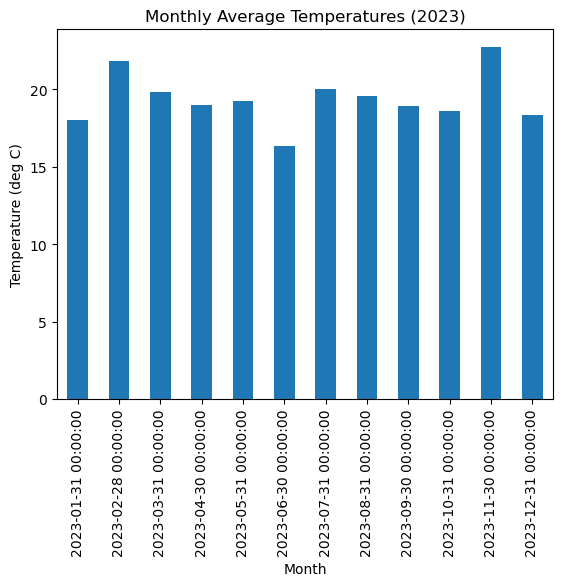

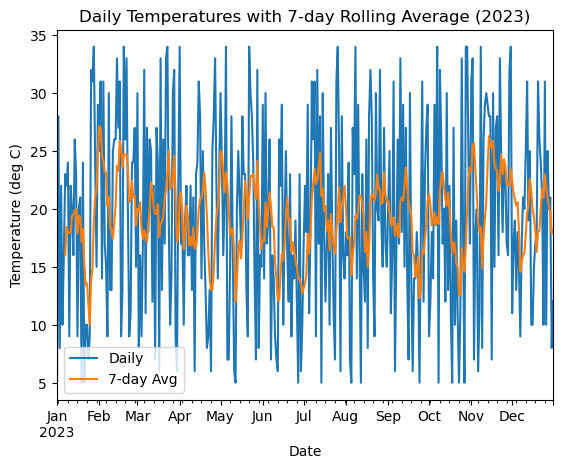

In [16]:

# Create a longer time series
long_dates = pd.date_range('20230101', periods=365)
yearly_temp = pd.Series(np.random.randint(5, 35, size=365), index=long_dates)

# Resample to monthly frequency and plot
monthly_temp = yearly_temp.resample('M').mean()
monthly_temp.plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('Monthly Average Temperatures (2023)')
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.show()

# Calculate rolling average
rolling_avg = yearly_temp.rolling(window=7).mean()
yearly_temp.plot()
rolling_avg.plot()
plt.title('Daily Temperatures with 7-day Rolling Average (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (deg C)')
plt.legend(['Daily', '7-day Avg'])
plt.show()


### Code Explanation: Creating a Year-Long Time Series, Resampling, and Plotting

This code snippet demonstrates how to create a longer time series for daily temperatures, resample the data for monthly analysis, and visualize the results using `matplotlib`. It also calculates and plots a rolling average.

#### Step-by-step Breakdown:

1. **Creating a Year-Long Time Series:**
   - `long_dates = pd.date_range('20230101', periods=365)` generates a date range for the entire year of 2023, creating 365 consecutive dates.
   - `yearly_temp = pd.Series(np.random.randint(5, 35, size=365), index=long_dates)` creates a `pandas` Series with 365 random daily temperature values between 5 and 35 degrees, indexed by the dates generated.

2. **Resampling to Monthly Frequency:**
   - `yearly_temp.resample('M').mean()` resamples the daily data into monthly frequency using the mean temperature for each month. 
   - The resampling aggregates the data by month, calculating the average temperature per month.
   - `monthly_temp.plot(kind='bar')` creates a bar chart to visually display the average temperatures for each month.

3. **Plotting the Monthly Data:**
   - The `matplotlib` library is used for visualization. The following are set:
     - `plt.title('Monthly Average Temperatures (2023)')`: Adds a title to the chart.
     - `plt.xlabel('Month')`: Labels the x-axis as "Month."
     - `plt.ylabel('Temperature (deg C)')`: Labels the y-axis as "Temperature (deg C)."
   - `plt.show()` displays the bar chart of monthly average temperatures.

4. **Calculating a Rolling Average:**
   - `yearly_temp.rolling(window=7).mean()` computes a 7-day rolling average of the temperature data, which smooths out daily fluctuations by averaging over 7 consecutive days.
   - The `.rolling(window=7)` method applies a moving window of 7 days, and `.mean()` computes the average over each window.

5. **Plotting the Daily and Rolling Averages:**
   - `yearly_temp.plot()` and `rolling_avg.plot()` plot the daily temperature and the 7-day rolling average on the same figure for comparison.
   - `plt.title('Daily Temperatures with 7-day Rolling Average (2023)')`: Adds a title to the line plot.
   - `plt.xlabel('Date')` and `plt.ylabel('Temperature (deg C)')`: Label the axes.
   - `plt.legend(['Daily', '7-day Avg'])`: Adds a legend to distinguish the daily data from the 7-day rolling average.
   - `plt.show()` displays the line plot.

The final result is two plots: a bar chart of monthly average temperatures and a line plot of daily temperatures alongside their 7-day rolling average.


## Hands-on Exercise
Load a small weather dataset (CSV) and perform basic data analysis using Pandas.


### Example: Weather Station Data Analysis

Let's put everything together in a more comprehensive example using simulated weather station data.


            temperature   humidity  wind_speed  precipitation
2023-01-01    19.967142  61.975591    0.092809       5.504388
2023-01-02    13.875557  74.481850   12.284443       0.106741
2023-01-03    21.993210  70.251848    0.626405       1.558702
2023-01-04    31.004594  71.953522    4.296203       2.469280
2023-01-05    13.690503  54.539804    1.601407       4.095407
       temperature    humidity  wind_speed  precipitation
count   365.000000  365.000000  365.000000     365.000000
mean     15.099464   68.609264    5.186665       2.076175
std      13.932120   19.170560    5.164572       2.101368
min     -32.106879   16.062267    0.032032       0.009904
25%       5.114012   54.817347    1.326078       0.592942
50%      13.997520   68.914103    3.763819       1.489569
75%      25.800640   82.655637    7.310986       2.641860
max      53.593280  100.000000   30.910972      14.883446
Monthly averages:             temperature   humidity  wind_speed  precipitation
2023-01-31    16.770184  7

C:\Users\ul834417\AppData\Local\Temp\ipykernel_3712\3774501964.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = weather_data.resample('M').mean()


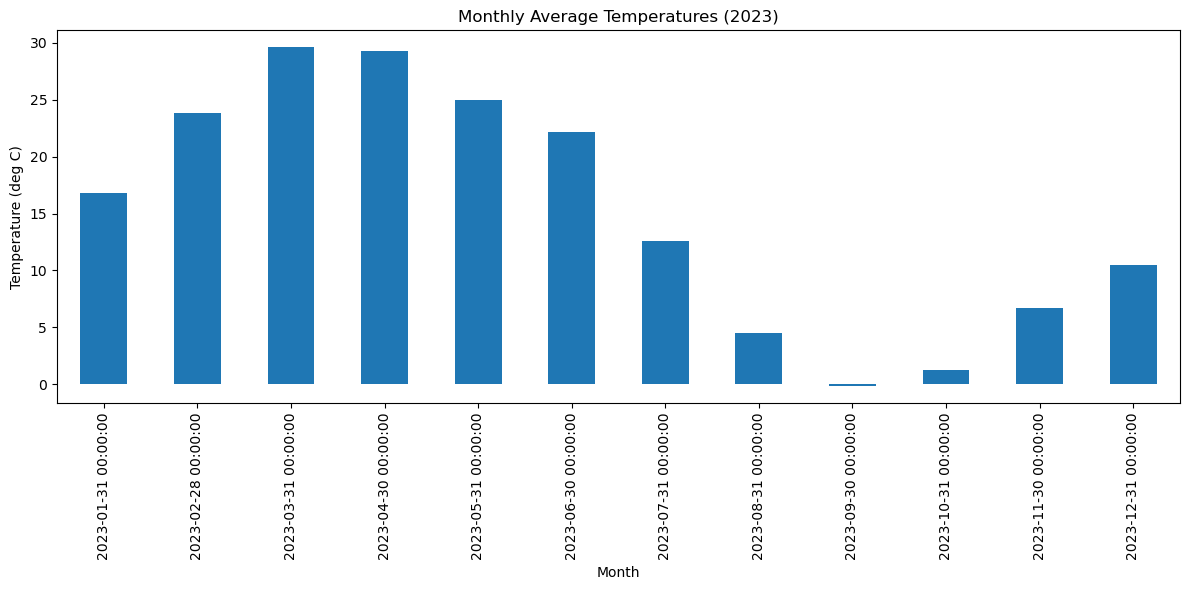

Correlation between variables:                temperature  humidity  wind_speed  precipitation
temperature       1.000000 -0.063763    0.090435       0.019194
humidity         -0.063763  1.000000    0.028679       0.089796
wind_speed        0.090435  0.028679    1.000000      -0.024776
precipitation     0.019194  0.089796   -0.024776       1.000000


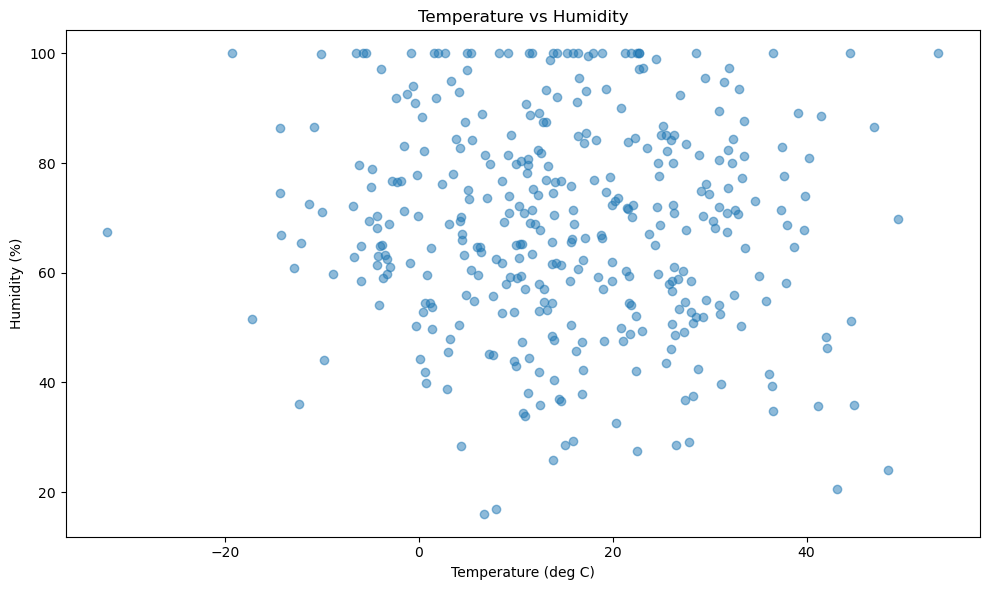

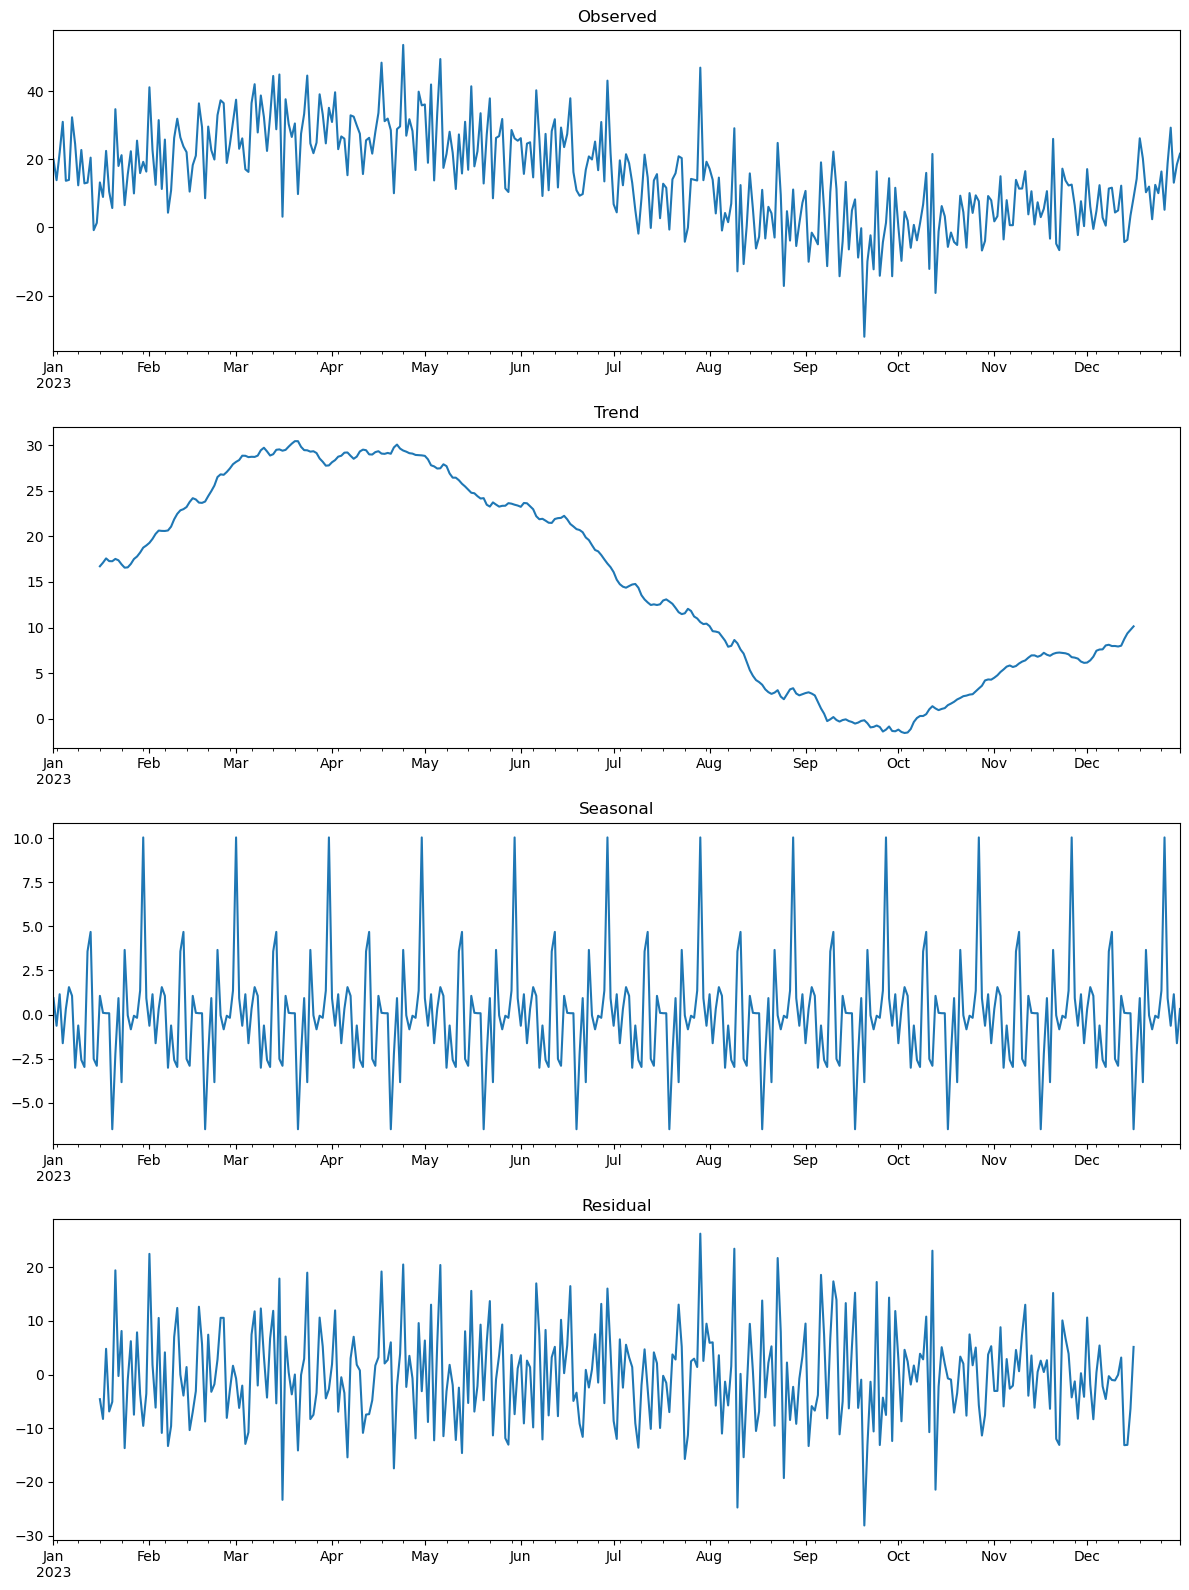

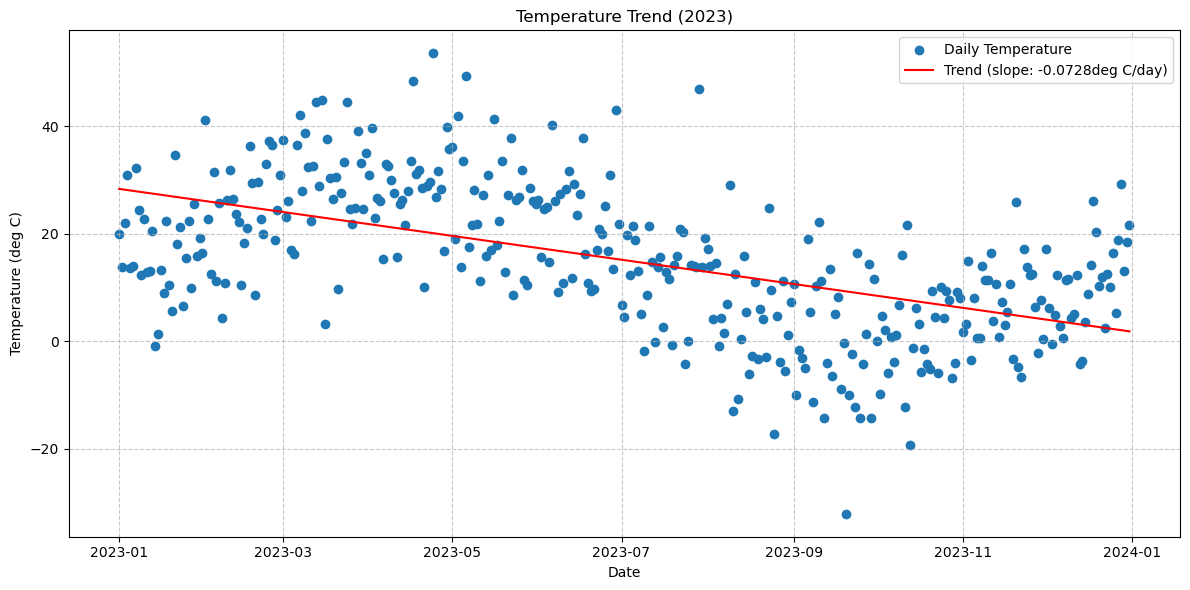

p-value: 0.0000
There is a statistically significant trend.


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate synthetic weather station data for the year 2023
dates = pd.date_range('20230101', periods=365)
np.random.seed(42)  # for reproducibility

weather_data = pd.DataFrame({
    'temperature': np.random.normal(15, 10, 365),  # mean 15 deg C, std 10 deg C
    'humidity': np.random.normal(70, 20, 365),     # mean 70%, std 20%
    'wind_speed': np.random.exponential(5, 365),   # mean 5 m/s
    'precipitation': np.random.exponential(2, 365) # mean 2 mm
}, index=dates)

# Add some seasonality to temperature
weather_data['temperature'] += 15 * np.sin(np.arange(365) * 2 * np.pi / 365)

# Ensure humidity is between 0 and 100
weather_data['humidity'] = weather_data['humidity'].clip(0, 100)

# Print the first few rows
print(weather_data.head())

# Basic statistics
print(weather_data.describe())

# Monthly averages
monthly_data = weather_data.resample('M').mean()
print("Monthly averages:", monthly_data)

# Plot monthly temperature
plt.figure(figsize=(12, 6))
monthly_data['temperature'].plot(kind='bar')
plt.title('Monthly Average Temperatures (2023)')
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.tight_layout()
plt.show()

# Correlation between variables
correlation = weather_data.corr()
print("Correlation between variables:", correlation)

# Scatter plot of temperature vs humidity
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['temperature'], weather_data['humidity'], alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

# Time series decomposition of temperature data
from statsmodels.tsa.seasonal import seasonal_decompose

# Use a period of 30 days (approximately one month) instead of 365
temp_decomposition = seasonal_decompose(weather_data['temperature'], model='additive', period=30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
temp_decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
temp_decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
temp_decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
temp_decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# Linear regression to check for temperature trend
x = np.arange(len(weather_data))
y = weather_data['temperature'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the data and the trend line
plt.figure(figsize=(12, 6))
plt.scatter(weather_data.index, weather_data['temperature'], label='Daily Temperature')
plt.plot(weather_data.index, intercept + slope * x, color='red', 
         label=f'Trend (slope: {slope:.4f}deg C/day)')
plt.title('Temperature Trend (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant trend.")
else:
    print("There is no statistically significant trend.")



This code block demonstrates time series decomposition:
1. We import `seasonal_decompose` from statsmodels, a powerful statistical analysis library.
2. We apply seasonal decomposition to our temperature data:
   - `model='additive'` assumes the components add up to the observed values.
   - `period=30` sets the seasonal cycle to 30 days (approximately one month).
3. The decomposition separates the time series into three components:
   - Trend: The long-term progression of the series.
   - Seasonal: The repeating, periodic signal in the series.
   - Residual: The remaining variation in the series (noise).
4. We plot each component separately:
   - Observed: The original temperature data.
   - Trend: Shows any long-term increase or decrease in temperature.
   - Seasonal: Reveals monthly patterns in temperature.
   - Residual: Displays any remaining unexplained variation.

This analysis helps identify patterns and anomalies in the temperature data, which is crucial for understanding climate trends and seasonality.


### Code Explanation: Analyzing Synthetic Weather Data for 2023

This code snippet demonstrates generating synthetic weather data for the year 2023, performing statistical analyses, visualizing data, and examining trends. The analysis includes generating data, calculating monthly averages, exploring correlations, and performing time series decomposition and linear regression.

#### Step-by-step Breakdown:

1. **Import Libraries:**
   - `pandas`, `numpy`, `matplotlib.pyplot`, and `scipy.stats` are imported for data manipulation, numerical operations, plotting, and statistical analysis.
   - `seasonal_decompose` from `statsmodels` is imported for time series decomposition.

2. **Generate Synthetic Weather Data:**
   - `dates = pd.date_range('20230101', periods=365)` creates a date range for each day of the year 2023.
   - `np.random.seed(42)` ensures reproducibility of random numbers.
   - A `DataFrame` is created with:
     - **Temperature:** Normally distributed with mean 15°C and standard deviation 10°C.
     - **Humidity:** Normally distributed with mean 70% and standard deviation 20%.
     - **Wind Speed:** Exponentially distributed with mean 5 m/s.
     - **Precipitation:** Exponentially distributed with mean 2 mm.
   - Seasonality is added to the temperature using a sine function to mimic annual temperature variations.

3. **Ensure Valid Range for Humidity:**
   - `weather_data['humidity'].clip(0, 100)` clips humidity values to lie between 0% and 100%.

4. **Print Initial Data:**
   - `print(weather_data.head())` displays the first few rows of the DataFrame.

5. **Calculate Basic Statistics:**
   - `weather_data.describe()` provides summary statistics including count, mean, standard deviation, and quartiles.

6. **Calculate and Print Monthly Averages:**
   - `monthly_data = weather_data.resample('M').mean()` calculates monthly averages.
   - `print("Monthly averages:", monthly_data)` outputs the average weather data for each month.

7. **Plot Monthly Temperature:**
   - `monthly_data['temperature'].plot(kind='bar')` creates a bar chart of monthly average temperatures.
   - Visualization is customized with titles and labels using `matplotlib`.

8. **Calculate and Print Correlation Between Variables:**
   - `correlation = weather_data.corr()` computes correlation coefficients between weather variables.
   - `print("Correlation between variables:", correlation)` displays the correlation matrix.

9. **Scatter Plot of Temperature vs Humidity:**
   - `plt.scatter(weather_data['temperature'], weather_data['humidity'], alpha=0.5)` creates a scatter plot to explore the relationship between temperature and humidity.
   - Visualization includes titles and labels.

10. **Time Series Decomposition of Temperature Data:**
    - `seasonal_decompose(weather_data['temperature'], model='additive', period=30)` decomposes the temperature data into observed, trend, seasonal, and residual components.
    - Plots are generated for each component using `matplotlib`.

11. **Linear Regression to Check Temperature Trend:**
    - `stats.linregress(x, y)` performs linear regression to assess the temperature trend over the year.
    - A scatter plot with a trend line is created, showing the daily temperature and the linear trend.
    - The slope and p-value are used to determine if the trend is statistically significant.

12. **Print Trend Significance:**
    - The p-value from the linear regression is checked to determine if the temperature trend is statistically significant.
    - A message is printed indicating whether the trend is significant.

The final output includes plots of monthly temperatures, scatter plots, time series decomposition, and a linear regression analysis, providing a comprehensive view of the synthetic weather data.



## Conclusion

This tutorial has provided a comprehensive introduction to using NumPy and Pandas for weather and climate data analysis. We've covered:

1. Basic data loading and structuring techniques
2. Exploratory data analysis using Pandas
3. Advanced data manipulation methods
4. Numerical computations with NumPy
5. Data visualization strategies
6. Simple climate trend analysis

These tools and techniques form a solid foundation for more advanced climate data analysis and modeling. As you progress in your research, you'll find that mastering these libraries will greatly enhance your ability to work with complex climate datasets efficiently.

Remember that while we used synthetic data for this tutorial, the same principles apply to real-world climate data. When working with actual climate datasets, always be mindful of data quality, missing values, and the specific characteristics of your data source.

Continue exploring these libraries and their documentation to discover more advanced features that can aid in your climate research endeavors.
